## Завдання 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, 
                             classification_report, f1_score, roc_curve, auc, 
                             precision_score, recall_score, mean_squared_error)

import warnings
from sklearn.exceptions import ConvergenceWarning


### 1. Завантажте вбудований датасет load_breast_cancer з бібліотеки sklearn.datasets

In [36]:
bc_dataset = load_breast_cancer()

### 2. Проведіть попередній аналіз даних 

##### Перегляньте перші кілька рядків
##### Перевірте назви стовпців та типи даних
##### Перевірте наявність пропущених значень
##### Досліджуйте розмір даних

In [37]:
df = pd.DataFrame(data=np.c_[bc_dataset.data, bc_dataset.target], columns=np.append(bc_dataset.feature_names, ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [38]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [39]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [40]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [41]:
df.shape

(569, 31)

### 3. Побудова і налаштування моделей

##### Розділіть дані на навчальний і тестовий набори
##### Побудуйте три моделі класифікації (на власний вибір), 
##### наприклад: Логістична регресія, Дерево рішень, Випадковий лісд
##### Підберіть оптимальні параметри для кожної моделі за допомогою 
##### GridSearchCV (можна вибрати інший оптимізатор)


In [42]:
data = bc_dataset.data
target = bc_dataset.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
clf = LogisticRegression(random_state=0, max_iter=5000).fit(X_train_scaled, y_train)
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l2']
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Найкращі параметри: ", grid_search.best_params_)

best_lr_model = grid_search.best_estimator_

Найкращі параметри:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [44]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
clf1 = RandomForestClassifier(random_state=0)
grid_search1 = GridSearchCV(estimator=clf1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search1.fit(X_train_scaled, y_train)
print("Найкращі параметри:", grid_search1.best_params_)

best_rf_model = grid_search1.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Найкращі параметри: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10}


In [45]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
clf2 = DecisionTreeClassifier(random_state=0)
grid_search2 = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search2.fit(X_train_scaled, y_train)
print("Найкращі параметри:", grid_search2.best_params_)

best_dt_model = grid_search2.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Найкращі параметри: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


C:\Users\prplct\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### 4.Оцініть моделі. Виведіть точність (accuracy) – обов’язково, матрицю помилок (confusion matrix) – за вибором та звіт про класифікацію(classification report) для кожної моделі.

### Логістична регресія

In [46]:
y_pred = best_lr_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Точність на тестовому наборі: {:.4f}".format(test_accuracy))

Точність на тестовому наборі: 0.9912


Матриця помилок:
[[42  1]
 [ 0 71]]


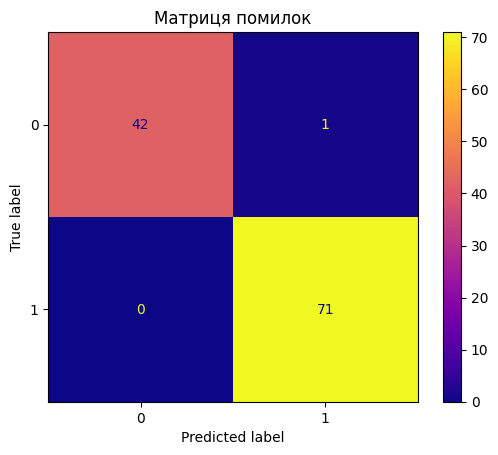

In [47]:
cm = confusion_matrix(y_test, y_pred)
print("Матриця помилок:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr_model.classes_)
disp.plot(cmap='plasma')

plt.title("Матриця помилок")
plt.show()

In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))


Classification Report:
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        43
     class 1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### Дерево рішень

In [49]:
y_pred1 = best_dt_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred1)
print("Точність на тестовому наборі: {:.4f}".format(test_accuracy))

Точність на тестовому наборі: 0.9561


Матриця помилок:
[[39  4]
 [ 1 70]]


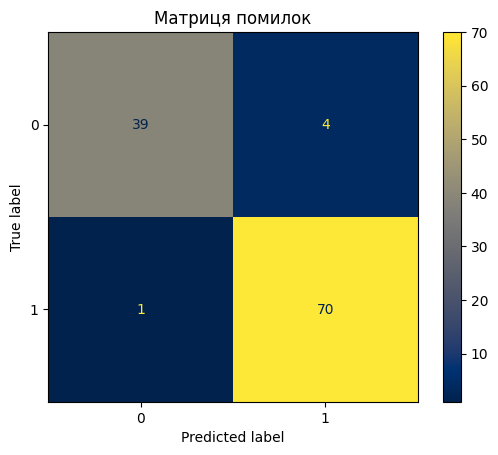

In [50]:
cm = confusion_matrix(y_test, y_pred1)
print("Матриця помилок:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt_model.classes_)
disp.plot(cmap='cividis')
plt.title("Матриця помилок")
plt.show()

In [51]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))


Classification Report:
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        43
     class 1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### Random forest


In [52]:
y_pred2 = best_rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred2)
print("Точність на тестовому наборі: {:.4f}".format(test_accuracy))

Точність на тестовому наборі: 0.9561


Матриця помилок:
[[39  4]
 [ 1 70]]


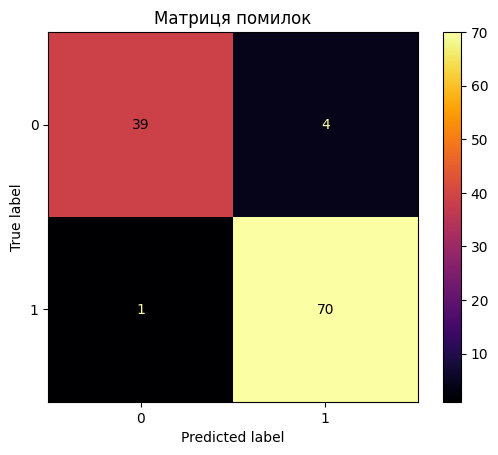

In [53]:
cm = confusion_matrix(y_test, y_pred2)
print("Матриця помилок:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap = 'inferno')
plt.title("Матриця помилок")
plt.show()

In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred2, target_names=['class 0', 'class 1']))


Classification Report:
              precision    recall  f1-score   support

     class 0       0.97      0.91      0.94        43
     class 1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 4. Прогнозування і висновки 

##### Оберіть найкращу модель на основі метрик продуктивності
##### Зробіть прогноз на тестовій вибірці
##### Виведіть результати прогнозування

In [21]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [22]:
y_pred1

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [23]:
y_pred2

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### Висновки:
##### Точність моделі логістичної регресії виявилась найвищою - 0.9912, тому для даної задачі ця модель підходить найбільше
##### Рішення знайдені моделями дерево рішень та випадковий ліс виявились однаковими
##### Прогнози для порівняння моделей були зроблені на тестовій вибірці


### Завдання 2

In [24]:
df_titanic = pd.read_csv('titanic.csv')

In [25]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Аналіз датасету

In [26]:
df_titanic.shape

(418, 12)

In [27]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [29]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Заміна пропущених значень на середнє або видалення стовпця

In [30]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(skipna = True), inplace = True)
df_titanic['Fare'].fillna(df_titanic['Fare'].mean(skipna = True), inplace = True)
df_titanic.drop('Cabin', axis = 1, inplace = True)

In [31]:
df_titanic.duplicated().sum()

0

In [32]:
# Розділення даних на тренувальний та тестовий набори
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(df_titanic.drop(columns = ['Survived']), 
                                                            df_titanic['Survived'], 
                                                            test_size = 0.2, 
                                                            random_state = 42)

# Я вважаю, що ID пасажиру, ім'я пасажиру та номер білету ніяк не впливають на те, чи вижила людина, тому надалі ці три стовпці використовувати не буду
X_train_t.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
X_test_t.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

# Визначення числових та категоріальних колонок
numeric_cols = X_train_t.select_dtypes(include = np.number).columns.tolist()
cat_cols     = X_train_t.select_dtypes(include = 'object').columns.tolist()

# Масштабування числових ознак
scaler = MinMaxScaler()

scaler.fit(X_train_t[numeric_cols])

X_train_t[numeric_cols] = scaler.fit_transform(X_train_t[numeric_cols])
X_test_t[numeric_cols]  = scaler.transform(X_test_t[numeric_cols])

# Кодування категоріальних ознак
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

encoder.fit(X_train_t[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols))

X_train_t[encoded_cols] = encoder.transform(X_train_t[cat_cols])
X_test_t[encoded_cols]  = encoder.transform(X_test_t[cat_cols])

# Визначення тренувального та валідаційного наборів із масштабованими колонками
X_train_t = X_train_t[numeric_cols + encoded_cols]
X_test_t  = X_test_t[numeric_cols + encoded_cols]

### Логістична регресія

##### Функція

In [54]:
def predict_and_plot(y_train, y_test, y_train_pred, y_test_pred):   
    plt.figure(figsize=(10, 3))
     
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print("Training accuracy: {:.2f}%".format(accuracy_train * 100))
    get_f1_score(y_train, y_train_pred, 'Training')
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("Test accuracy: {:.2f}%".format(accuracy_test * 100))
    get_f1_score(y_test, y_test_pred, 'Test')
    
    plt.subplot(1, 2, 1)
    cf_train = confusion_matrix(y_train, y_train_pred, normalize='true')
    sns.heatmap(cf_train, annot=True, cmap='YlGnBu')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Training Confusion Matrix')

    plt.subplot(1, 2, 2)
    cf_test = confusion_matrix(y_test, y_test_pred, normalize='true')
    sns.heatmap(cf_test, annot=True, cmap='RdPu') 
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Test Confusion Matrix')

    plt.tight_layout()  # Для кращого відображення графіків
    plt.show()

def get_report(targets_train, preds_train, targets_test, preds_test):
    print('Training')
    print(classification_report(targets_train, preds_train, digits = 4))
    print('\nTest')
    print(classification_report(targets_test, preds_test, digits = 4))
def get_f1_score(target, preds, name=''):
    f1_score_ = f1_score(target, preds)
    print(f"F1 score {name}: {f1_score_:.2f}%")

def compute_auroc_and_build_roc(inputs, targets, model, name=''):
    y_pred_proba = model.predict_proba(inputs)[:, 1]

    fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print(f'AUROC for {name}: {roc_auc:.4f}')

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

Training accuracy: 100.00%
F1 score Training: 1.00%
Test accuracy: 100.00%
F1 score Test: 1.00%


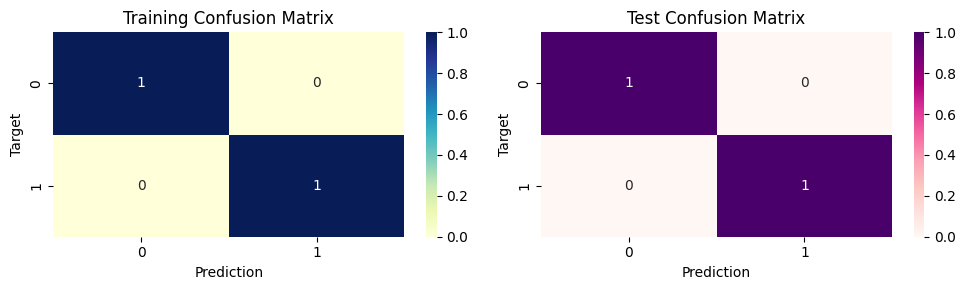

AUROC for Training: 1.0000


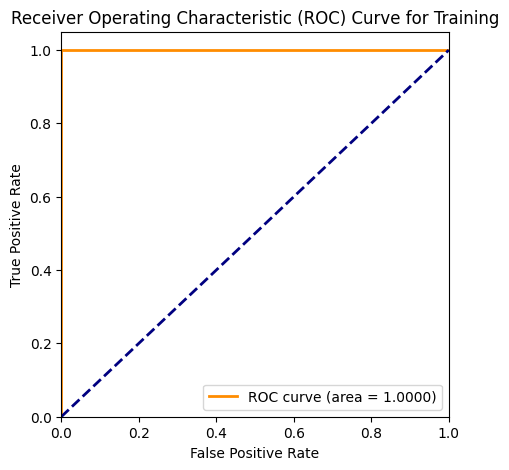

AUROC for Test: 1.0000


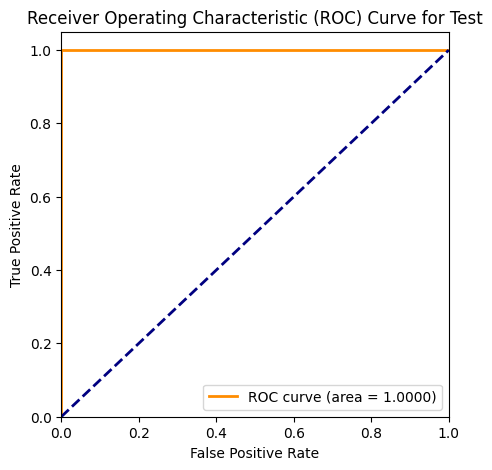

In [55]:
# Створення моделі
model_log_t = LogisticRegression(solver = 'liblinear')
model_log_t.fit(X_train_t, y_train_t)

# Прогнозування моделі
train_pred_logistic_t = model_log_t.predict(X_train_t)
test_pred_logistic_t  = model_log_t.predict(X_test_t)

# Оцінка моделі
predict_and_plot(y_train_t, y_test_t, train_pred_logistic_t, test_pred_logistic_t)
compute_auroc_and_build_roc(X_train_t, y_train_t, model_log_t, 'Training')
compute_auroc_and_build_roc(X_test_t, y_test_t, model_log_t, 'Test')

Модель без налаштування параметрів ідеально передбачає результати як на тренувальних, так і на тестових даних.

### random forest

Training
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       216
           1     1.0000    1.0000    1.0000       118

    accuracy                         1.0000       334
   macro avg     1.0000    1.0000    1.0000       334
weighted avg     1.0000    1.0000    1.0000       334


Test
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        50
           1     1.0000    1.0000    1.0000        34

    accuracy                         1.0000        84
   macro avg     1.0000    1.0000    1.0000        84
weighted avg     1.0000    1.0000    1.0000        84

Training accuracy: 100.00%
F1 score Training: 1.00%
Test accuracy: 100.00%
F1 score Test: 1.00%


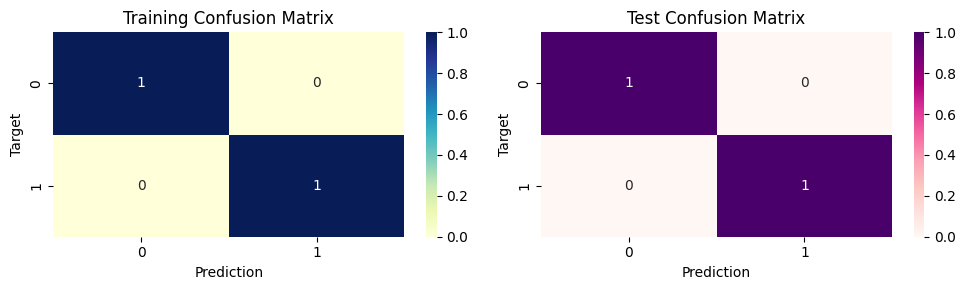

AUROC for Training: 1.0000


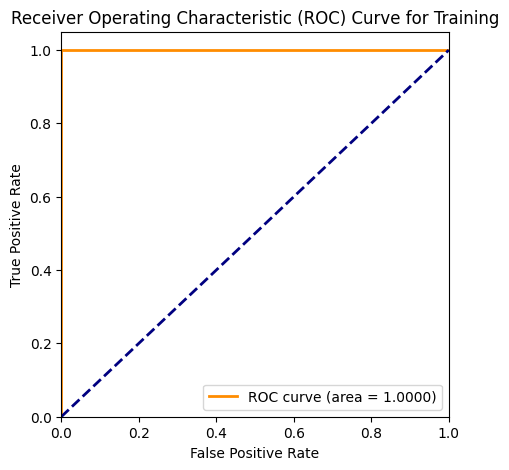

AUROC for Test: 1.0000


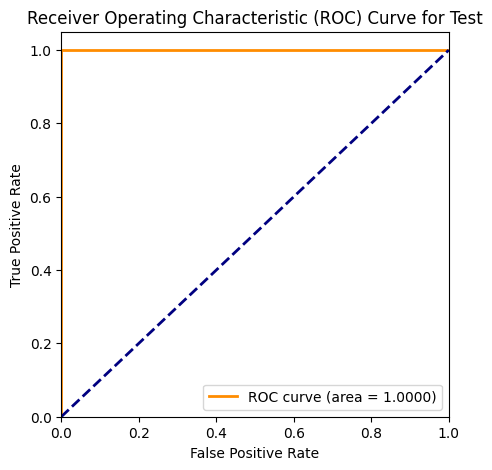

In [56]:
#створення моделі
model_rnd_clf_t = RandomForestClassifier(n_estimators = 5,
                                         max_leaf_nodes = 16,
                                         n_jobs = -1,
                                         random_state = 42)

#тренування моделі
model_rnd_clf_t.fit(X_train_t, y_train_t)

#прогнозування моделі
train_pred_rnd_clf_t = model_rnd_clf_t.predict(X_train_t)
test_pred_rnd_clf_t  = model_rnd_clf_t.predict(X_test_t)

#оцінка моделі
get_report(y_train_t, train_pred_rnd_clf_t, y_test_t, test_pred_rnd_clf_t)
predict_and_plot(y_train_t, y_test_t, train_pred_rnd_clf_t, test_pred_rnd_clf_t)
compute_auroc_and_build_roc(X_train_t, y_train_t, model_rnd_clf_t, 'Training')
compute_auroc_and_build_roc(X_test_t, y_test_t, model_rnd_clf_t, 'Test')

Модель без налаштування параметрів ідеально передбачає результати як на тренувальних, так і на тестових даних.

### decision tree

Training
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       216
           1     1.0000    1.0000    1.0000       118

    accuracy                         1.0000       334
   macro avg     1.0000    1.0000    1.0000       334
weighted avg     1.0000    1.0000    1.0000       334


Test
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        50
           1     1.0000    1.0000    1.0000        34

    accuracy                         1.0000        84
   macro avg     1.0000    1.0000    1.0000        84
weighted avg     1.0000    1.0000    1.0000        84

Training accuracy: 100.00%
F1 score Training: 1.00%
Test accuracy: 100.00%
F1 score Test: 1.00%


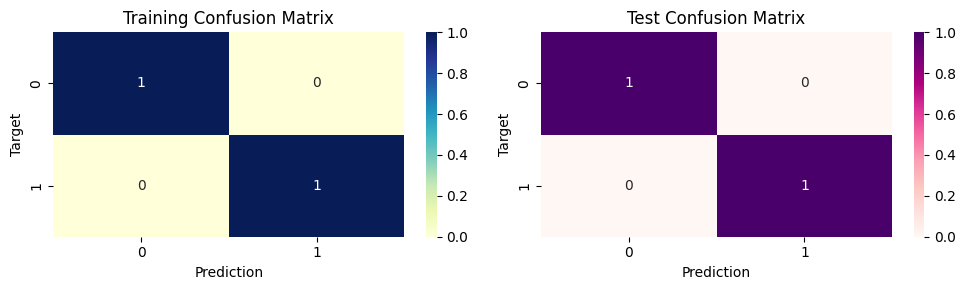

AUROC for Training: 1.0000


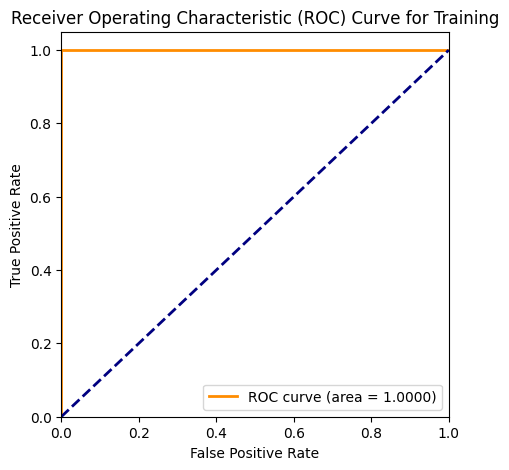

AUROC for Test: 1.0000


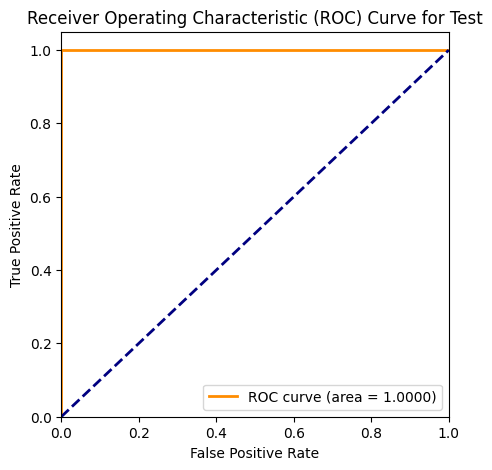

In [57]:
model_dt_t = DecisionTreeClassifier(random_state = 42)
model_dt_t.fit(X_train_t, y_train_t)

train_pred_dt_t = model_dt_t.predict(X_train_t)
test_pred_dt_t  = model_dt_t.predict(X_test_t)

get_report(y_train_t, train_pred_dt_t, y_test_t, test_pred_dt_t)
predict_and_plot(y_train_t, y_test_t, train_pred_dt_t, test_pred_dt_t)
compute_auroc_and_build_roc(X_train_t, y_train_t, model_dt_t, 'Training')
compute_auroc_and_build_roc(X_test_t, y_test_t, model_dt_t, 'Test')

Модель без налаштування параметрів ідеально передбачає результати як на тренувальних, так і на тестових даних.

## Висновки

##### Отже, навіть якщо робити без додаткового підбору гіперпараметрів всі три моделі ідеально прогнозують дані.